In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [3]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [4]:
X = df.drop("Target", axis=1)
y = df["Target"]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Initializing KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Predicting on the test set
y_pred = knn.predict(X_test)
# Evaluating performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7084745762711865
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.79      0.71      0.75       316
    Enrolled       0.39      0.26      0.31       151
    Graduate       0.73      0.87      0.79       418

    accuracy                           0.71       885
   macro avg       0.64      0.61      0.62       885
weighted avg       0.69      0.71      0.69       885



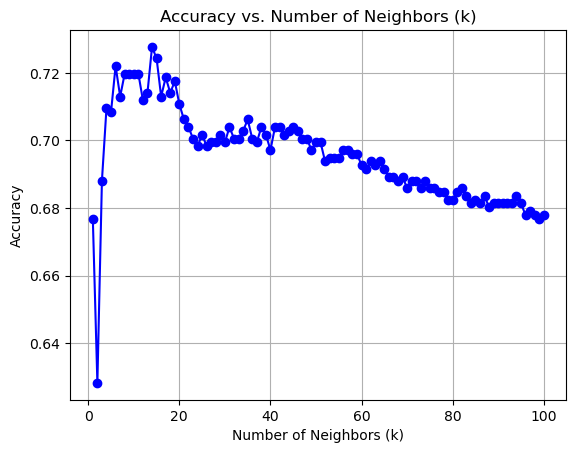

In [7]:
import matplotlib.pyplot as plt

# List to store accuracy for each k
accuracies = []

# Testing different k values
k_values = range(1, 101)  # From 1 to 101
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting accuracy vs k
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [8]:
for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k}, Accuracy={accuracy_score(y_test, y_pred):.2f}")

k=1, Accuracy=0.68
k=2, Accuracy=0.63
k=3, Accuracy=0.69
k=4, Accuracy=0.71
k=5, Accuracy=0.71
k=6, Accuracy=0.72
k=7, Accuracy=0.71
k=8, Accuracy=0.72
k=9, Accuracy=0.72
k=10, Accuracy=0.72
k=11, Accuracy=0.72
k=12, Accuracy=0.71
k=13, Accuracy=0.71
k=14, Accuracy=0.73
k=15, Accuracy=0.72
k=16, Accuracy=0.71
k=17, Accuracy=0.72
k=18, Accuracy=0.71
k=19, Accuracy=0.72
k=20, Accuracy=0.71
k=21, Accuracy=0.71
k=22, Accuracy=0.70
k=23, Accuracy=0.70
k=24, Accuracy=0.70
k=25, Accuracy=0.70
k=26, Accuracy=0.70
k=27, Accuracy=0.70
k=28, Accuracy=0.70
k=29, Accuracy=0.70
k=30, Accuracy=0.70
k=31, Accuracy=0.70
k=32, Accuracy=0.70
k=33, Accuracy=0.70
k=34, Accuracy=0.70
k=35, Accuracy=0.71
k=36, Accuracy=0.70
k=37, Accuracy=0.70
k=38, Accuracy=0.70
k=39, Accuracy=0.70
k=40, Accuracy=0.70
k=41, Accuracy=0.70
k=42, Accuracy=0.70
k=43, Accuracy=0.70
k=44, Accuracy=0.70
k=45, Accuracy=0.70
k=46, Accuracy=0.70
k=47, Accuracy=0.70
k=48, Accuracy=0.70
k=49, Accuracy=0.70
k=50, Accuracy=0.70
k=51, Acc